# Modelo Preditivo para Câncer de Próstata

## Tem como objetivos:

    - Analisar e Explorar os dados:
        - Verificar a proporção dos dados
        - Verificar a distribuição dos dados
        - Visualização de dados
    
    - Processamento de dados:
        - Aplicar técnicas de ajustes aos dados (Scaling)
        - Divisão de dados de treino e teste
 
    - Construção e comparação dos modelos de classificação:
        - Random Forest Classification
        - Decision Tree Classification
        - KNN Classification
        - Logistic Regression Classification
    

In [1]:
%reload_ext watermark
%watermark -a "Reyso C Teixeira" --iversions

Author: Reyso C Teixeira



In [2]:
# Pacotes de manipulação de dados
import pandas as pd
import numpy as np

# Pacotes para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes para modelos preditivos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# exibindo o dataframe

df = pd.read_csv('Prostate_Cancer.csv',sep = ','); df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [4]:
# Colunas
df.columns.to_list()

['id',
 'diagnosis_result',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension']

## Algumas caracteríticas dos dados

In [5]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


## Valores Nulos

In [6]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [7]:
#paleta de cores
iris = '#5D3FD3'
indigo = '#3F00FF'
royal_blue = '#4169E1'
light_steel_blue = '#B0C4DE'
slate_gray = '#B0C4DE'
light_slate_gray = '#778899'
medium_green = '#00FA9A'
jade = '#00A36C'

## Vamos observar a proporção dos disgnósticos

In [8]:
df['diagnosis_result'] = df['diagnosis_result'].replace('M','Malígno')
df['diagnosis_result'] = df['diagnosis_result'].replace('B','Benígno')

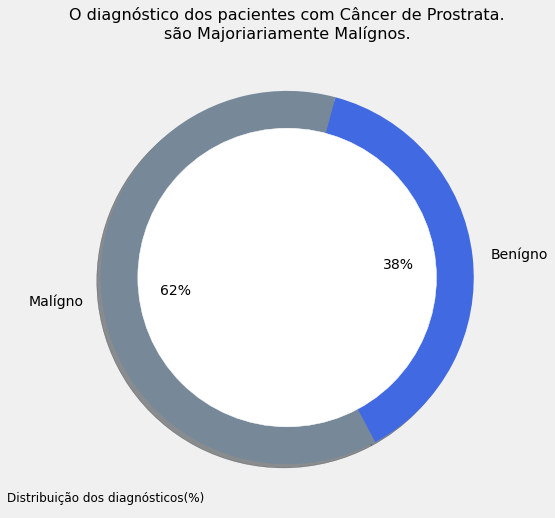

In [9]:
val = df['diagnosis_result'].value_counts()
labels = val.index.tolist()

# Grafico
## estilo dos gráficos
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,8))
plt.pie(val,
        autopct='%1.0f%%', #porcentagem
        labels= labels, # Legendas
        startangle=75, # angulo do gráfico
        shadow=True, # sombras
        #explode = (0,0.1),
        colors=[light_slate_gray,royal_blue]) # cores

# circulo central
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Tamanho da fonte 
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 14

#titulo e texto
plt.title('O diagnóstico dos pacientes com Câncer de Prostrata.\nsão Majoriariamente Malígnos.', fontdict={'size':16})
plt.text(-1.5,-1.2,'Distribuição dos diagnósticos(%)',fontdict={'size':12})

plt.show()

De acordo com os dados, temos predominantemente diagnósticos de cancêr malígnos.

Neste momento, precisaremos modificar a variável `diagnosis_result`

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['diagnosis_result']=enc.fit_transform(df['diagnosis_result'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    int32  
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int32(1), int64(5)
memory usage: 7.5 KB


Portanto,
 - Classe 1 indica diagnóstico MALÍGNO.
 - Classe 0 indica diagnóstico BENÍGNO.

In [11]:
val_encode = df['diagnosis_result'].value_counts(); val_encode

1    62
0    38
Name: diagnosis_result, dtype: int64

In [12]:
df = df.drop(columns=['id'], axis= 0)

A coluna `ID` não será utilizada nesta análise.

## Correlação entre as variáveis

In [13]:
# Data correlation matrix
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,1.000000,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180
radius,-0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


###

A variável `Fractal dimension` e `texture` apresentam baixa correlação com o nosso alvo, por tanto nos iremos eliminar. Além disso, a fim de eliminar a redundância, iremos retirar do dataset a `perimeter`, pois há uma correlação muito forte com `area`

In [14]:
df = df.drop(['fractal_dimension', 'texture', 'perimeter'], axis=1); df


,diagnosis_result,radius,area,smoothness,compactness,symmetry
0,1,23,954,0.143,0.278,0.242
1,0,9,1326,0.143,0.079,0.181
2,1,21,1203,0.125,0.160,0.207
3,1,14,386,0.070,0.284,0.260
4,1,9,1297,0.141,0.133,0.181
...,...,...,...,...,...,...
95,1,23,1264,0.091,0.131,0.210
96,0,22,451,0.105,0.071,0.190
97,0,19,295,0.102,0.053,0.135
98,0,21,413,0.090,0.075,0.162


## Distribuição das outras variáveis

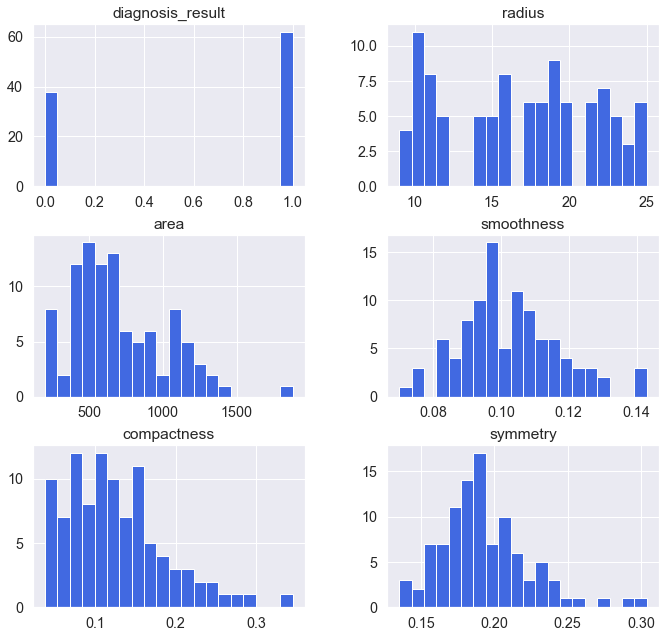

In [15]:
sns.set(font_scale = 1.3, rc = {'figure.figsize':(10,10)})
ax = df.hist(bins = 20 , color = (royal_blue) )

Podemos observar que, nenhuma variável destes dados obdecem uma distribuição normal.

## Rescalling dos dados

In [16]:
# Dividindo em subset de entreda e saída
array = df.values

x = array[:,1:6]
Y = array[:,0]

In [17]:
# Alterando a escala dos dados para 0 e 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x)

In [18]:
X

array([[0.875     , 0.44868735, 1.        , 0.78175896, 0.63313609],
       [0.        , 0.67064439, 1.        , 0.13355049, 0.27218935],
       [0.75      , 0.59725537, 0.75342466, 0.39739414, 0.4260355 ],
       [0.3125    , 0.1097852 , 0.        , 0.80130293, 0.73964497],
       [0.        , 0.65334129, 0.97260274, 0.30944625, 0.27218935],
       [1.        , 0.16408115, 0.79452055, 0.42996743, 0.43786982],
       [0.4375    , 0.5       , 0.34246575, 0.23127036, 0.26035503],
       [0.375     , 0.22434368, 0.67123288, 0.41368078, 0.50295858],
       [0.625     , 0.18973747, 0.78082192, 0.50488599, 0.59171598],
       [1.        , 0.16348449, 0.67123288, 0.65798046, 0.40236686],
       [0.9375    , 0.35560859, 0.16438356, 0.09446254, 0.10650888],
       [0.5       , 0.34546539, 0.36986301, 0.29641694, 0.28994083],
       [0.3125    , 0.54952267, 0.36986301, 0.67752443, 0.62130178],
       [0.1875    , 0.34665871, 0.19178082, 0.2019544 , 0.29585799],
       [0.1875    , 0.22434368, 0.

## Divisão dos dados

Estamos preparados para a divisão dos dados de treino e teste

In [19]:
from sklearn.model_selection import train_test_split

# 70% treino, 30% teste
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=7)


Representando a divisão proporcial dos dados

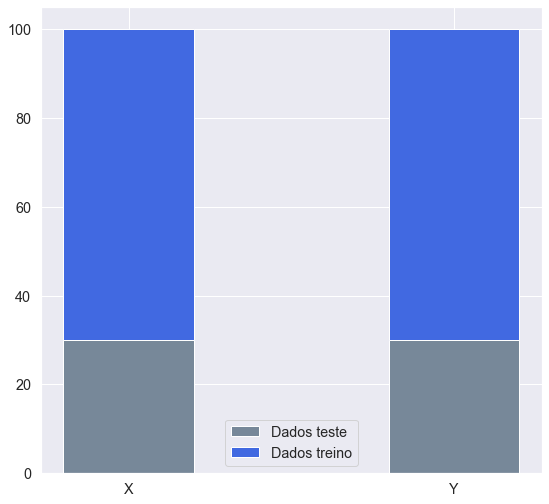

In [20]:
# Tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# valores para grafico
x_graph = ['X', 'Y']
test = [len(Xtest), len(Ytest)] 
train = [len(Xtrain), len(Ytrain)]

#gráfico
plt.bar(x_graph, test,
        width=0.4,
       color=light_slate_gray) 

plt.bar(x_graph, train,
        bottom=test,
       width=0.4,
       color = royal_blue)


plt.legend(["Dados teste", "Dados treino"])
plt.show() 


## Modelos de classificação

In [21]:
nome_metodo = []
acuracia_metodo = []
seed = 52

### Random Forest

Acurácia: 83.333%


<AxesSubplot:>

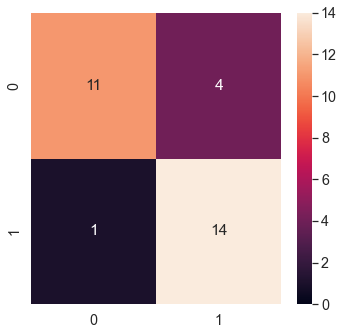

In [22]:
from sklearn.ensemble import RandomForestClassifier


randomf = RandomForestClassifier(n_estimators=200,random_state=seed)
randomf.fit(Xtrain,Ytrain)
pred_randomf = randomf.predict(Xtest)



# Avaliando as previsões
accuracy_rf = accuracy_score(Ytest, pred_randomf)*100
print("Acurácia: %.3f%%" % (accuracy_rf))


nome_metodo.append("Random Forest")
acuracia_metodo.append(accuracy_rf)




# Matriz de confusão
mc_random = confusion_matrix(Ytest,pred_randomf)
plt.figure(figsize=(5,5))
sns.heatmap(mc_random,annot=True,vmin=0)



### Decision Tree

Acurácia: 86.667%


<AxesSubplot:>

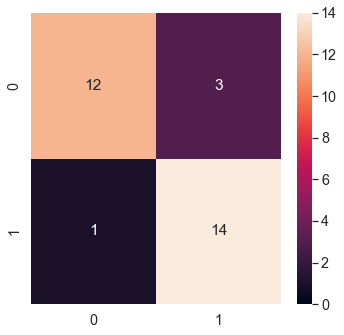

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=seed)
dtree.fit(Xtrain,Ytrain)
pred_dtree = dtree.predict(Xtest)



# Avaliando as previsões
accuracy_dt = accuracy_score(Ytest, pred_dtree)*100
print("Acurácia: %.3f%%" % (accuracy_dt))



nome_metodo.append("Decision Tree")
acuracia_metodo.append(accuracy_dt)




# Matriz de confusão
mc_dtree = confusion_matrix(Ytest,pred_dtree)
plt.figure(figsize=(5,5))
sns.heatmap(mc_dtree,annot=True,vmin=0)


###  KNN

Acurácia: 73.333%


<AxesSubplot:>

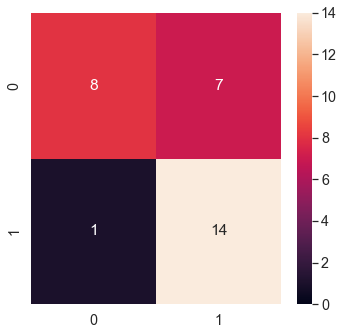

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,Ytrain)
pred_knn = knn.predict(Xtest)



# Avaliando as previsões
accuracy_kn = accuracy_score(Ytest, pred_knn)*100
print("Acurácia: %.3f%%" % (accuracy_kn))


nome_metodo.append("KNN")
acuracia_metodo.append(accuracy_kn)




# Matriz de confusão
mc_knn = confusion_matrix(Ytest,pred_knn)
plt.figure(figsize=(5,5))
sns.heatmap(mc_knn,annot=True,vmin=0)


### Logistic Regression

Acurácia: 66.667%


<AxesSubplot:>

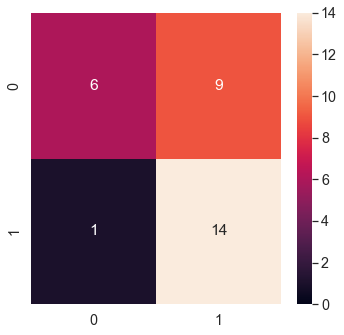

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=seed)
logreg.fit(Xtrain,Ytrain)
pred_logreg = logreg.predict(Xtest)


# Avaliando as previsões
accuracy_lr = accuracy_score(Ytest, pred_logreg)*100
print("Acurácia: %.3f%%" % accuracy_lr)



nome_metodo.append("Logistic Regression")
acuracia_metodo.append(accuracy_lr)


# Matriz de confusão
mc_logreg = confusion_matrix(Ytest,pred_logreg)
plt.figure(figsize=(5,5))
sns.heatmap(mc_logreg,annot=True,vmin=0)


## Comparação

Text(-0.6, 57, 'Comparação de score entre os modelos (%)')

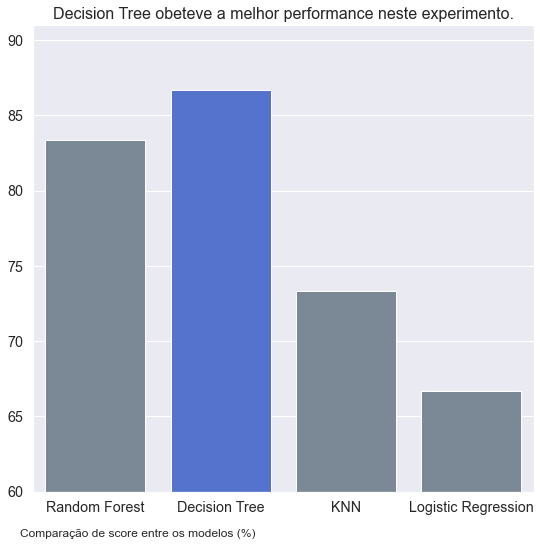

In [26]:
# Tamanho da figura
fig2, ax = plt.subplots(1, 1, figsize=(8,8))


#figura
sns.barplot(x = nome_metodo,y = acuracia_metodo,
           palette=[light_slate_gray,royal_blue,light_slate_gray,light_slate_gray])
plt.ylim([60,91])



#titulo e texto
plt.title('Decision Tree obeteve a melhor performance neste experimento.', fontdict={'size':16})
plt.text(-0.6,57,'Comparação de score entre os modelos (%)',fontdict={'size':12})